In [1]:
import sys; sys.path.append("../")

In [2]:
import pandas as pd
import os
from utils_analysis import *
%matplotlib inline

# Read which experiments are done

In [3]:
run_exp = read_overview_csv()
run_exp

Saving overview in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/run_overview.csv


,run_name,clean_name,dataset,optimisation,drop,target_rate,matrix,emb,mem
0,2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-ru...,PTB | CYC-FB-0.5 | matrix-mem,PTB,CYC-FB-0.5,0.0,0.5,True,False,True
1,2021-05-21-PTB | VAE | memory-run-05:50:37,PTB | VAE | mem,PTB,VAE,0.0,0.0,False,False,True
2,2021-05-21-PTB | VAE | memory | DROP 40-run-05...,PTB | VAE | mem | DROP 40,PTB,VAE,0.4,0.0,False,False,True
3,2021-05-21-PTB | VAE | memory-embeddings-run-0...,PTB | VAE | mem-emb,PTB,VAE,0.0,0.0,False,True,True
4,2021-05-21-PTB | VAE | memory-embeddings | DRO...,PTB | VAE | mem-emb | DROP 40,PTB,VAE,0.4,0.0,False,True,True
5,2021-05-25-PTB | MDR-0.5 | matrix-memory-run-0...,PTB | MDR-0.5 | matrix-mem,PTB,MDR-0.5,0.0,0.5,True,False,True
6,2021-05-22-PTB | CYC-FB-0.5 | memory-run-02:03:27,PTB | CYC-FB-0.5 | mem,PTB,CYC-FB-0.5,0.0,0.5,False,False,True
7,2021-05-22-PTB | CYC-FB-0.5 | memory | DROP 40...,PTB | CYC-FB-0.5 | mem | DROP 40,PTB,CYC-FB-0.5,0.4,0.5,False,False,True
8,2021-05-22-PTB | CYC-FB-0.5 | memory-embedding...,PTB | CYC-FB-0.5 | mem-emb,PTB,CYC-FB-0.5,0.0,0.5,False,True,True
9,2021-05-22-PTB | CYC-FB-0.5 | memory-embedding...,PTB | CYC-FB-0.5 | mem-emb | DROP 40,PTB,CYC-FB-0.5,0.4,0.5,False,True,True


# Check which runs are missing

In [4]:
big_exp = {}
i = 0
for dataset in ["YELP", "OPTIMUS YELP", "PTB"]:
    for drop_out in [0.0, 0.4]:
        drop_str = " | DROP 40" if drop_out == 0.4 else ""
        for optimisation in ["CYC-FB-0.5", "MDR-0.5", "VAE"]:
            for mech in ["matrix", "matrix-mem", "mem", "mem-emb"]:
                big_exp[i] = {
                    "optimisation": optimisation,
                    "drop_out": drop_out,
                    "mech": mech,
                    "dataset": dataset,
                    "clean_name": f"{dataset} | {optimisation} | {mech}{drop_str}"
                }
                i += 1
                
all_exp = pd.DataFrame(big_exp).transpose()
i = 0
print("Runs missing in big experiment:\n")
for clean_name in all_exp["clean_name"].values:
    if clean_name not in run_exp["clean_name"].values:
        print(i, clean_name)
        i += 1

Runs missing in big experiment:

0 YELP | CYC-FB-0.5 | matrix
1 YELP | CYC-FB-0.5 | matrix-mem
2 YELP | MDR-0.5 | matrix
3 YELP | MDR-0.5 | matrix-mem
4 YELP | VAE | matrix
5 YELP | VAE | matrix-mem
6 YELP | CYC-FB-0.5 | matrix | DROP 40
7 YELP | CYC-FB-0.5 | matrix-mem | DROP 40
8 YELP | MDR-0.5 | matrix | DROP 40
9 YELP | MDR-0.5 | matrix-mem | DROP 40
10 YELP | MDR-0.5 | mem-emb | DROP 40
11 YELP | VAE | matrix | DROP 40
12 YELP | VAE | matrix-mem | DROP 40
13 OPTIMUS YELP | CYC-FB-0.5 | matrix
14 OPTIMUS YELP | CYC-FB-0.5 | matrix-mem
15 OPTIMUS YELP | CYC-FB-0.5 | mem
16 OPTIMUS YELP | CYC-FB-0.5 | mem-emb
17 OPTIMUS YELP | MDR-0.5 | matrix
18 OPTIMUS YELP | MDR-0.5 | matrix-mem
19 OPTIMUS YELP | MDR-0.5 | mem
20 OPTIMUS YELP | MDR-0.5 | mem-emb
21 OPTIMUS YELP | VAE | matrix
22 OPTIMUS YELP | VAE | matrix-mem
23 OPTIMUS YELP | VAE | mem
24 OPTIMUS YELP | VAE | mem-emb
25 OPTIMUS YELP | CYC-FB-0.5 | matrix | DROP 40
26 OPTIMUS YELP | CYC-FB-0.5 | matrix-mem | DROP 40
27 OPTIMUS YE

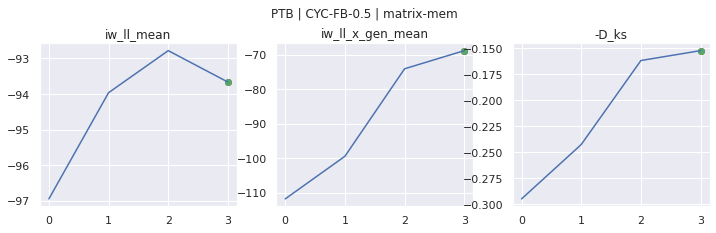

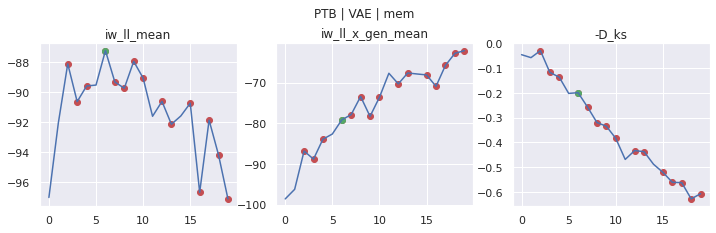

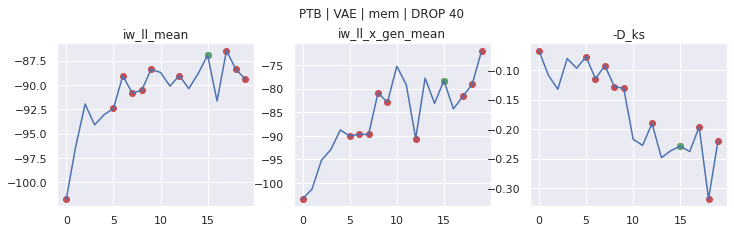

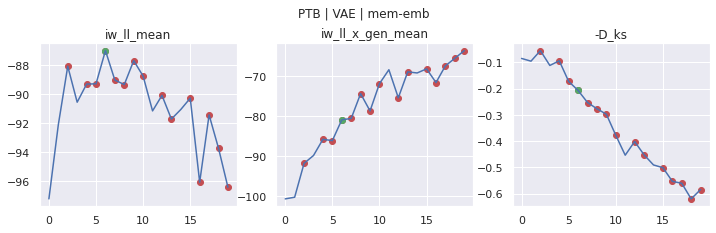

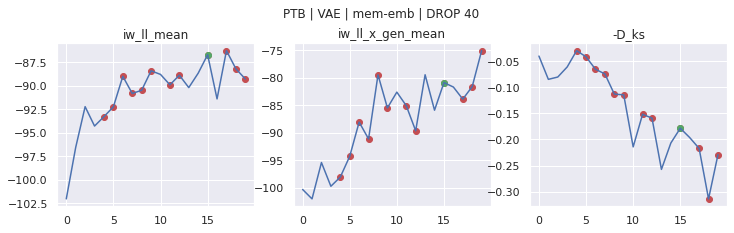

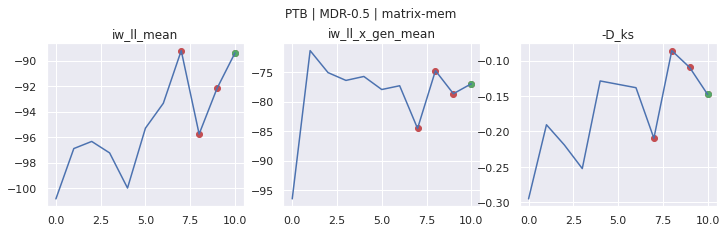

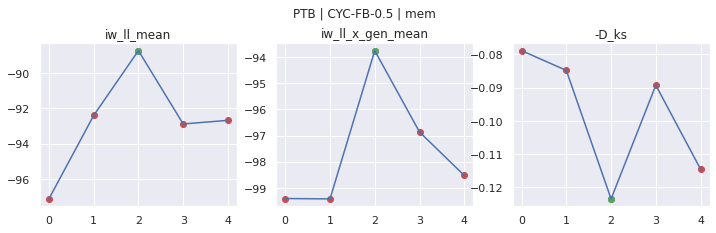

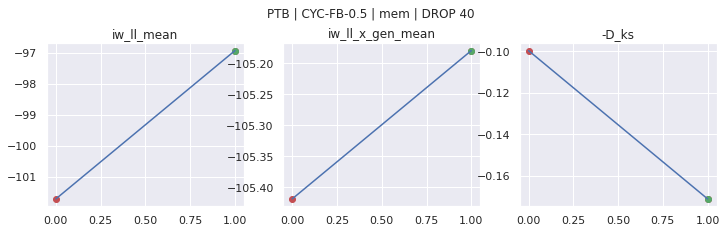

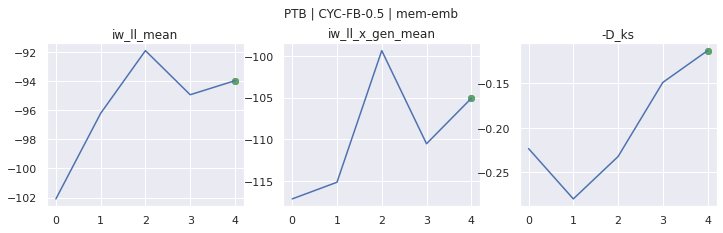

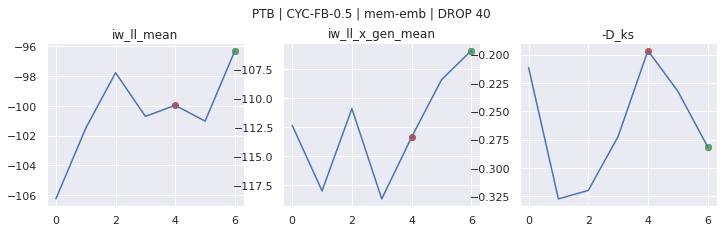

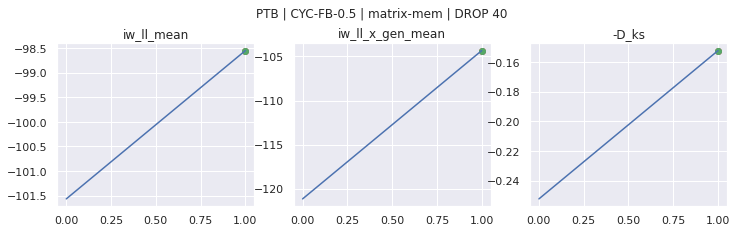

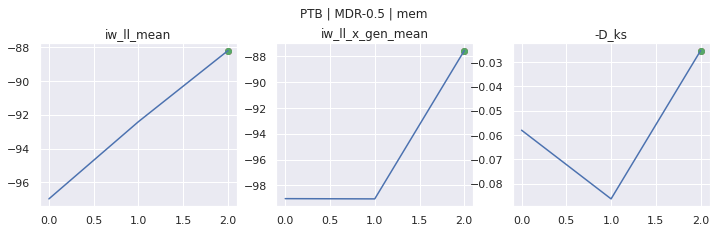

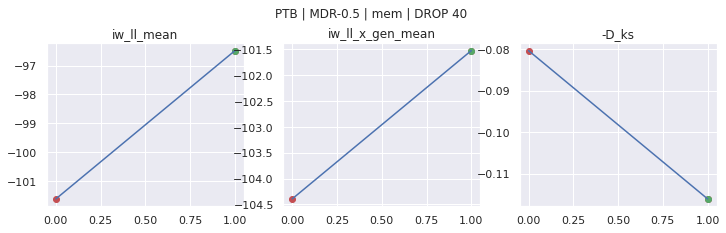

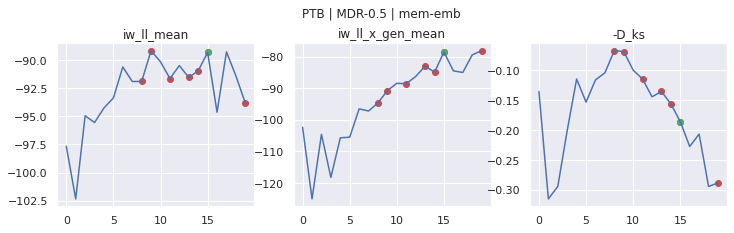

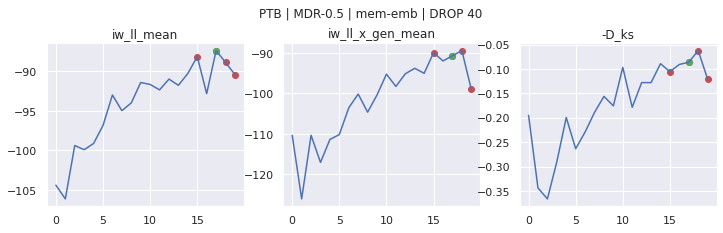

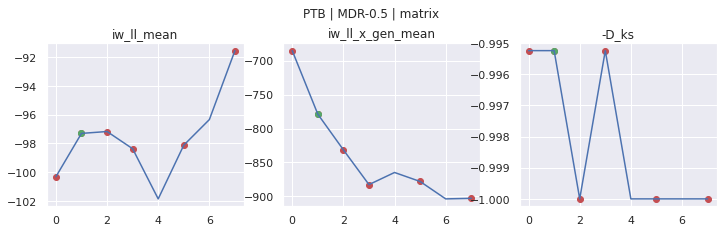

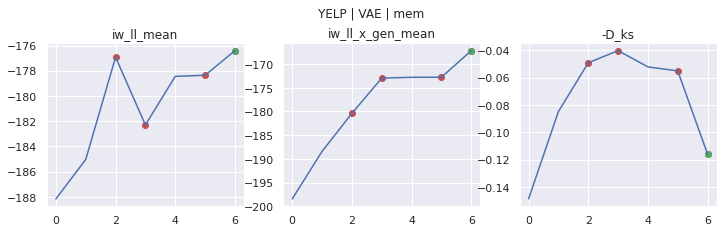

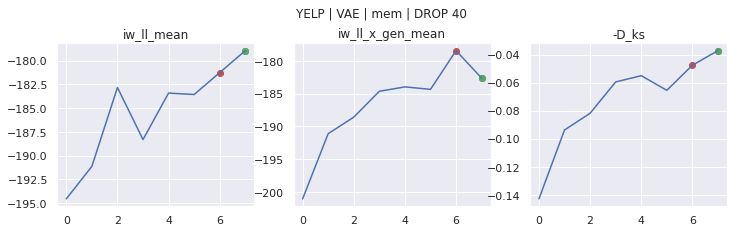

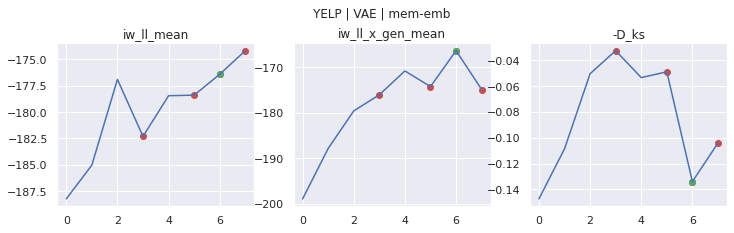

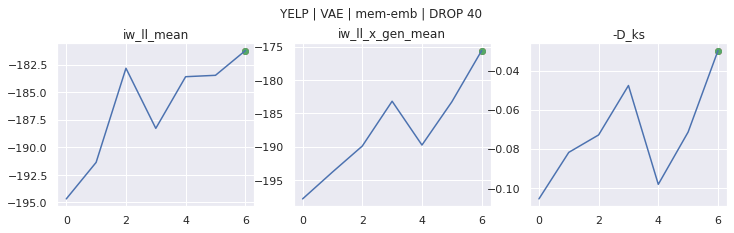

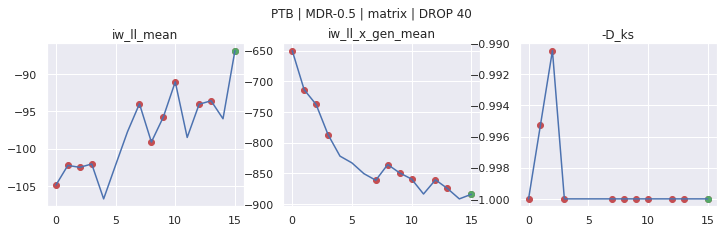

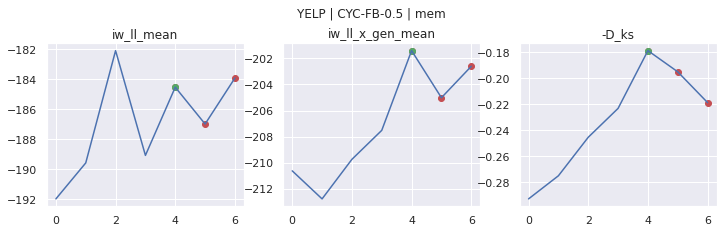

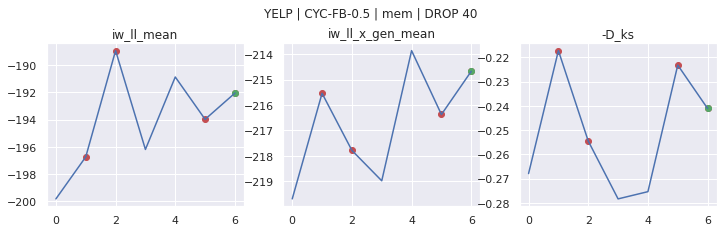

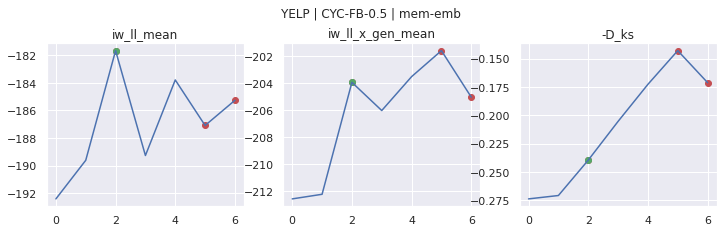

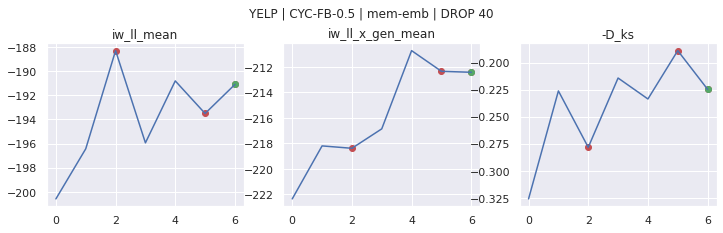

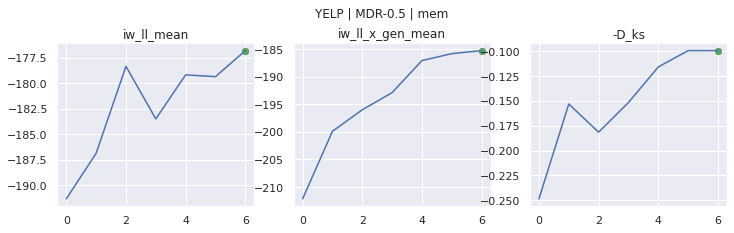

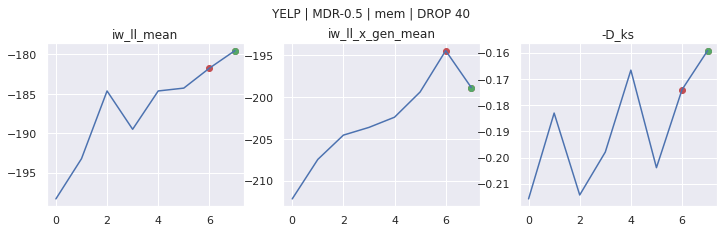

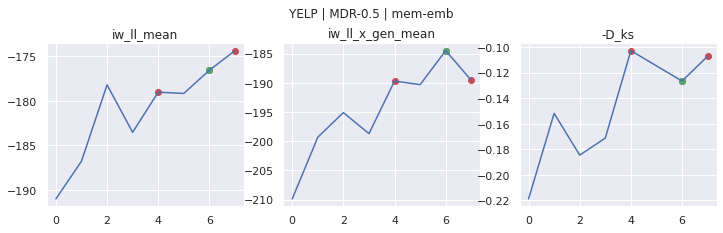

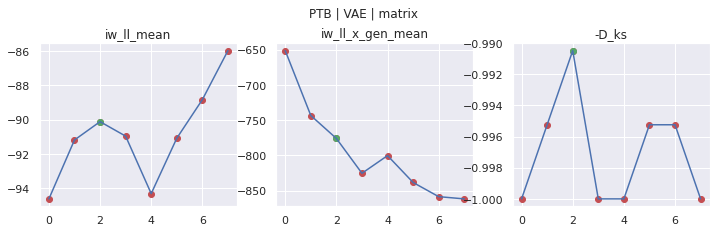

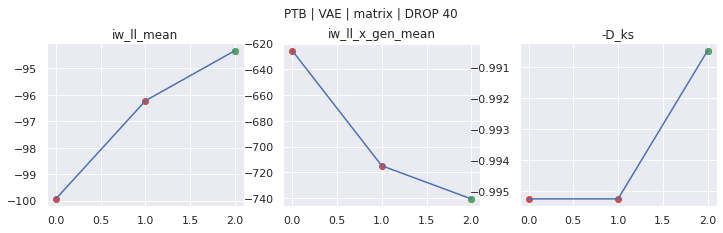

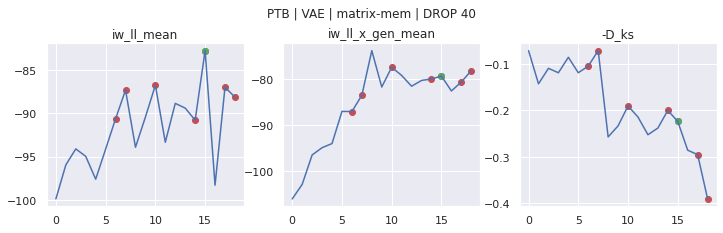

In [5]:
save_last_pareto_dict_to_pickle()

for row_i, row in run_exp.iterrows():
    p, best_epoch = get_best_checkpoint(row["run_name"])
    plot_pareto_stats(row["run_name"], clean_name=row["clean_name"], best_epoch=best_epoch)